# Conducción de calor 1D.

- Autor: Luis M. de la Cruz Salas
- Rev: mié 24 feb 2021 14:41:27 CST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis
from macti.evaluation import Quizz, FileAnswer
quizz = Quizz('1', 'GeoMaC', 'Conduccion_de_calor_1D', 'local')
#file_answer = FileAnswer('GeoMaC', 'Conduccion_de_calor_1D', 'local')

Considere el siguiente problema:
$$
\begin{eqnarray}
-\left(k \frac{d^2 T(x)}{d x^2} + \omega ^2 T(x)\right) & = & 0 \,\,\,\,\, x \in [0,1] \tag{1}\\
T(0) & = & T_A \\
T(1) & = & T_B 
\end{eqnarray}
$$

donde $T_A = T_B = k = 1$ y cuya solución analítica es:

$$T(x) = \frac{1-\cos(\omega)}{\sin(\omega)} \sin(\omega x) + \cos(\omega x)$$
	
donde $\omega$ = constante.

## <font color="DodgerBlue">Ejercicio 1.</font>

---

Definir los parámetros del problema:

* Parámetros físicos: $L, T_A, T_B, k, S, \omega = 2.5 * pi $
* Parámetros numéricos: $N = 39, h$
* Coordenadas de la malla: $x$


```python
# Parámetros físicos: L, TA, TB, k, S, w = 2.5 * pi
L = ...
...

# Parámetros numéricos: N, h
N = ...
...

# Coordenadas de la malla
x = ...
```

---


In [2]:
### BEGIN SOLUTION
# Parámetros físicos: L, TA, TB, k, S, w = 2.5 * pi
L = 1.0
TA = 1.0
TB = 1.0
k = 1.0
S = 0.0
w = 2.5 * np.pi

# Parámetros numéricos: N, h
N = 39
h = L / (N+1)

# Coordenadas de la malla
x = np.linspace(0, L, N+2)

#file_answer.write('1', h, 'Checa el cómo debe calcularse h.')
#file_answer.write('2', x, 'Debes usar x = np.linspace(...) y poner los argumentos correspondientes.')
### END SOLUTION
# Parámetros físicos: L, TA, TB, k, S, w = 2.5 * pi

# Parámetros numéricos: N, h

# Coordenadas de la malla


In [3]:
quizz.eval_numeric('1', h)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [4]:
quizz.eval_numeric('2', x)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


## <font color="DodgerBlue">Ejercicio 2.</font>

---
Definir lo siguiente:

* Arreglo para almacenar la solución: `T`
* Valores de la temperatura conocidos en las fronteras: `T[0]` y `T[-1]`
* Lado derecho del sistema: `b`
* Aplicacion de las condiciones de frontera tipo Dirichlet: `b[0]` y `b[-1]`
* Matriz del sistema lineal. Para ello usa la función `buildMatrix(...)` con los parámetros correctos.
* Solución del sistema lineal usando la función `np.linalg.solve(...)`.


```python
# Arreglo para almacenar la solución
T = ...

# Valores de la temperatura conocidos en las fronteras:
T[0] = ...
T[-1] = ...

# Lado derecho del sistema
b = ...

# Aplicacion de las condiciones de frontera tipo Dirichlet
b[0] = ...
b[-1] = ...

# Matriz del sistema lineal
w = ...
A = ...

# Solución del sistema lineal
T[1:-1] = ...
```

---

In [5]:
def buildMatrix(N, d):
    '''
    Parameters:
    N: int Tamaño de la matriz.
    d: float Contenido de la diagonal.
    '''
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = d
    A[0,1] = -1
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = d
        A[i,i+1] = -1
        A[i,i-1] = -1
    
    # Último renglón
    A[N-1,N-2] = -1
    A[N-1,N-1] = d
    
    return A

In [6]:
### BEGIN SOLUTION
# Arreglo para almacenar la solución
T = np.zeros(N+2)

# Los valores en los extremos son conocidos debido a las cond. Dirichlet
T[ 0] = TA
T[-1] = TB

# Lado derecho del sistema
b = np.zeros(N) 

# Aplicacion de las condiciones de frontera Dirichlet
b[ 0] += TA   
b[-1] += TB 

#file_answer.write('3', b, 'Checa el tamaño correcto de b y los valores en los extremos.')

# Construcción de la matriz
w = 2.5 * np.pi
A = buildMatrix(N, 2-(w * h)**2) # Matriz del sistema

#file_answer.write('4', A.diagonal(), 'Debes usar A = buildMatrix(...) y poner los argumentos correspondientes.')

# Solución del sistema lineal
T[1:-1] = np.linalg.solve(A,b)

#file_answer.write('5', T, 'Checa el tamaño correcto de T y los valores en los extremos. Debes usar T[1:-1] = np.linalg.solve(...) y poner los argumentos correspondientes. ')

### END SOLUTION
# Arreglo para almacenar la solución

# Los valores en los extremos son conocidos debido a las cond. Dirichlet

# Lado derecho del sistema

# Aplicacion de las condiciones de frontera Dirichlet

# Construcción de la matriz


In [7]:
quizz.eval_numeric('3', b)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [8]:
quizz.eval_numeric('4',A.diagonal())

----------------------------------------
Tu resultado es correcto.
----------------------------------------


In [9]:
quizz.eval_numeric('5', T,)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


## <font color="DodgerBlue">Ejercicio 3.</font>

---
* Agregar una función para calcular la solución exacta.

```python
def solExact(x, w):
    ...

```

* Calcular el error entre solución exacta y numérica.

---

In [10]:
### BEGIN SOLUTION
# Agrega la función: def solExact(x, w):
def solExact(x,w):
    return ((1.0 - 1.0 * np.cos(w))/np.sin(w)) * np.sin(w * x) + np.cos(w * x)

# Cálculo del error:
Error = np.linalg.norm(solExact(x,w) - T, 2)

#file_answer.write('6', Error, 'Checa la implementación de la solución exacta y el cálculo del error.')
### END SOLUTION
# Agrega la función: def solExact(x, w):

# Cálculo del error:

print(Error)

0.04614723768420724


In [11]:
quizz.eval_numeric('6', Error)

----------------------------------------
Tu resultado es correcto.
----------------------------------------


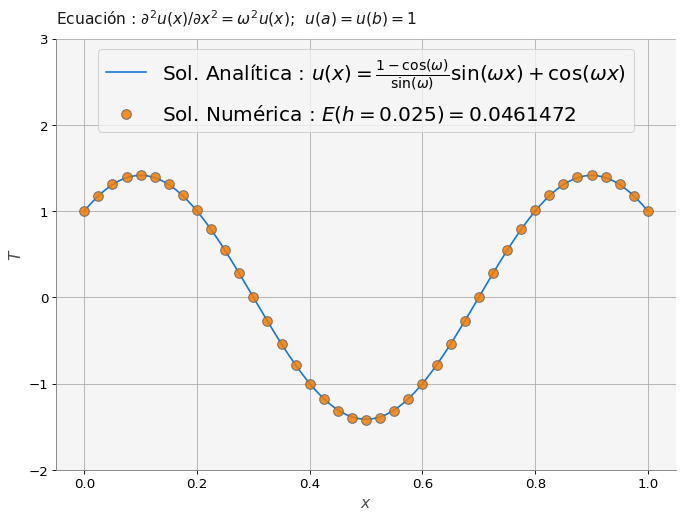

In [12]:
#
# El código siguiente realiza las gráficas usando lo calculado en las celdas anteriores
#
titulo = 'Ecuación : $\partial^2 u(x)/\partial x^2 = \omega^2 u(x); \,\,\, u(a) = u(b) = 1$'
numerica = 'Sol. Numérica : $E(h = %g) = %g$' % (h, Error)
exacta = 'Sol. Analítica : $u(x) = \\frac{1 - \cos(\omega)}{\sin(\omega)} \sin(\omega x) + \cos(\omega x)$'

plt.figure(figsize=(10,7))
xsol = np.linspace(0,1,100)
plt.plot(xsol, solExact(xsol,w),'-', label=exacta)
plt.scatter(x, T, fc = 'C1', ec='dimgray', s=75, alpha=0.85, zorder= 10, label=numerica)
plt.title(titulo)
plt.xlabel('$x$')
plt.ylabel('$T$')
plt.ylim(-2.0,3.0)
plt.legend(loc='upper center', fontsize=18)
plt.grid()
plt.show()

In [ ]:
#file_answer.to_file('1')